In [45]:
import keras
import os
from glob import glob
import cv2
import numpy as np
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras.models import Model
import os
import cv2
from tensorflow.keras.utils import to_categorical
from Brats2020_Segmentation_Data_Generator import imageLoader
import matplotlib.pyplot as plt
import random


tensorflow version: 2.10.0


In [46]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"

val_img_dir = "BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "BraTS2020_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [47]:
batch_size = 1

train_dataset = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_dataset = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

In [48]:
input_images, target_images=train_dataset.__next__()

In [49]:
# Print shape information
print("Shape of input images:", input_images.shape)
print("Shape of target images:", target_images.shape)

Shape of input images: (1, 128, 128, 128, 4)
Shape of target images: (1, 128, 128, 128, 4)


In [106]:
# Load the saved generator model
generator = tf.keras.models.load_model("generator50")
discriminator=tf.keras.models.load_model("discriminator50")

In [119]:
import matplotlib.pyplot as plt

img_num = 132

test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_" + str(img_num) + ".npy")
test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_" + str(img_num) + ".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

print("Shape of test_img:", test_img.shape)
print("Shape of test_mask:", test_mask.shape)





Shape of test_img: (128, 128, 128, 4)
Shape of test_mask: (128, 128, 128, 4)


In [120]:
test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = generator.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]
print("Shape of test_img:", test_prediction_argmax.shape)

1/1 [==============================] - 0s 218ms/step
Shape of test_img: (128, 128, 128)


<Figure size 1200x800 with 0 Axes>

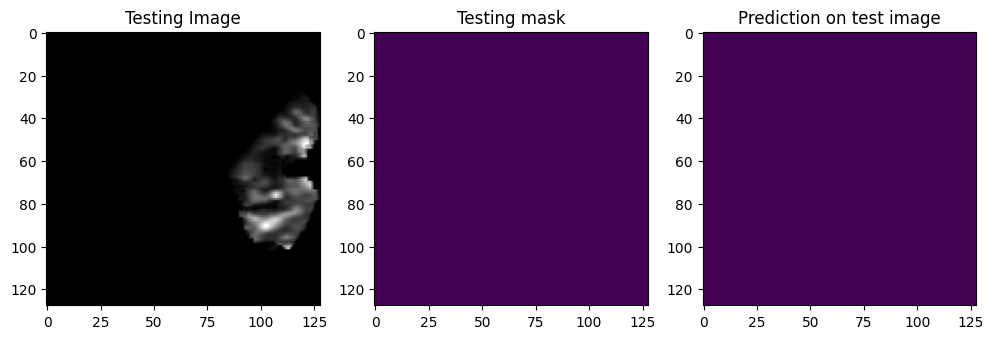

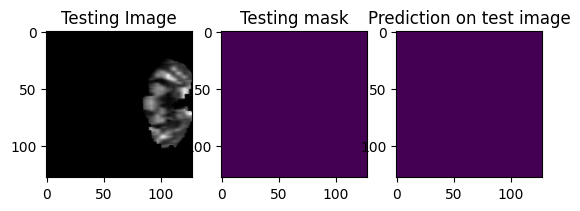

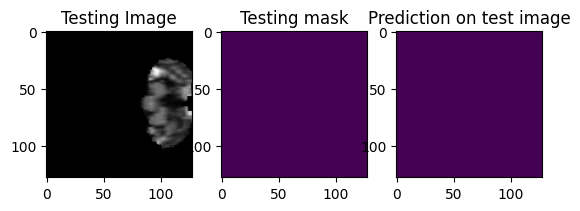

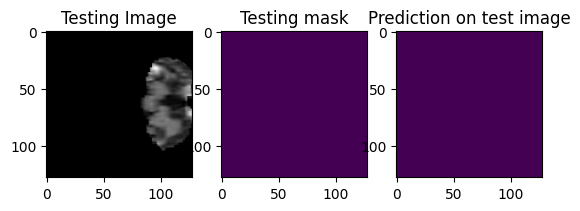

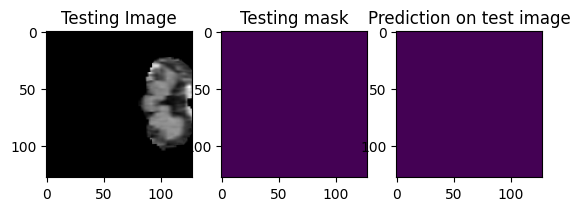

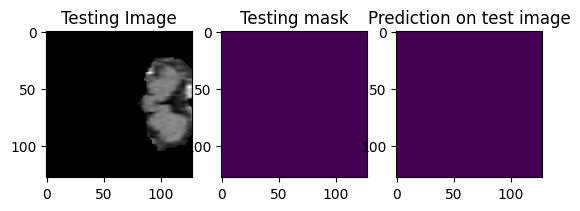

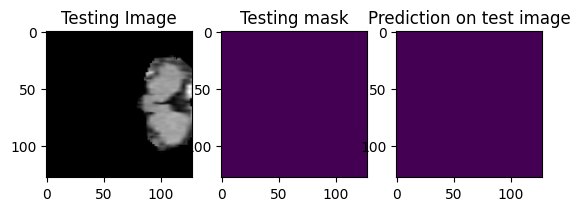

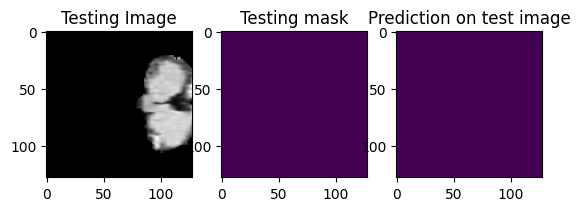

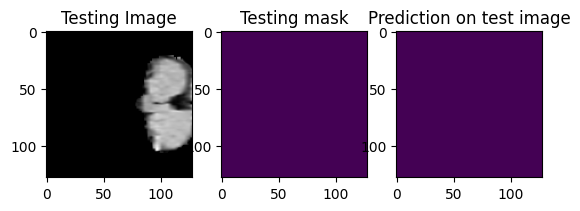

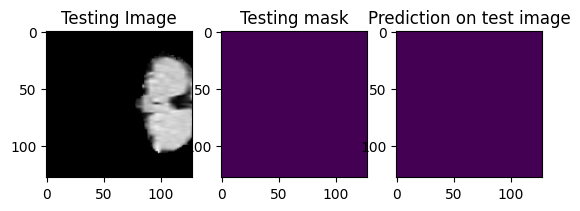

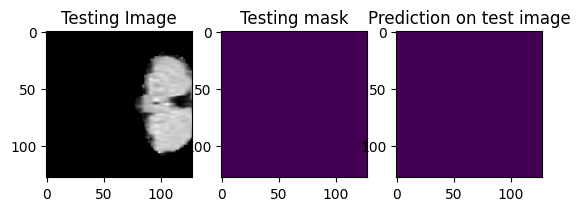

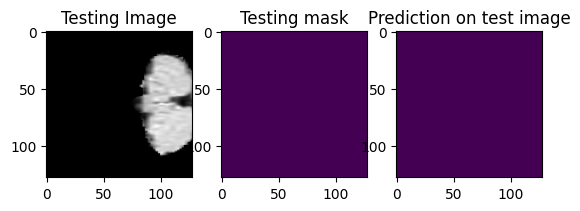

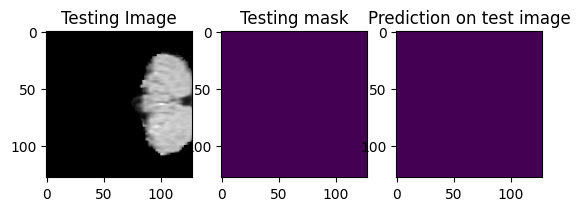

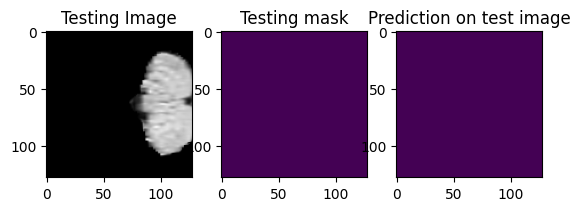

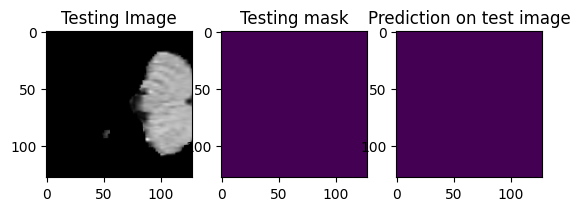

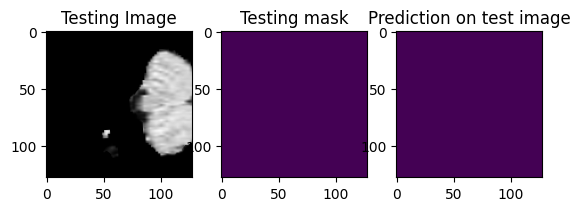

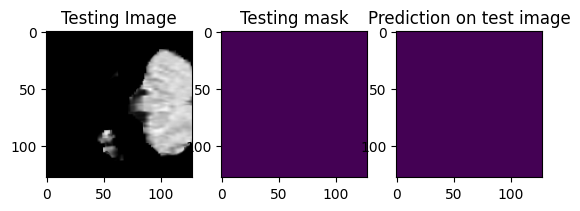

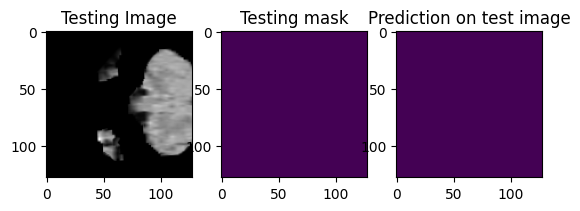

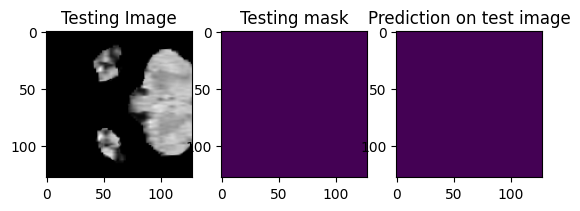

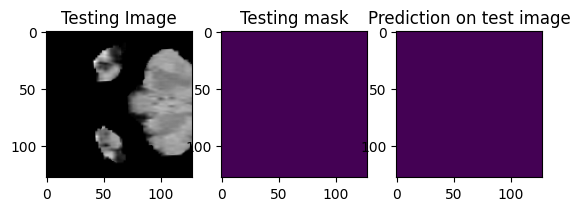

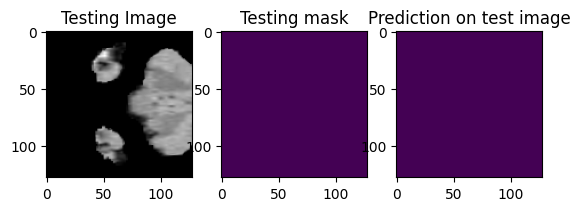

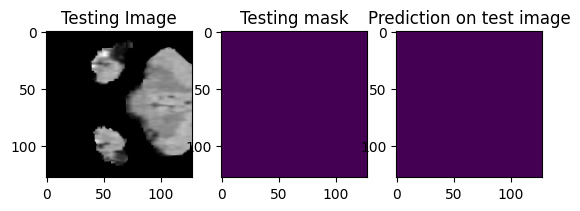

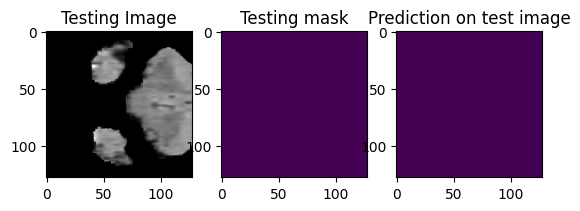

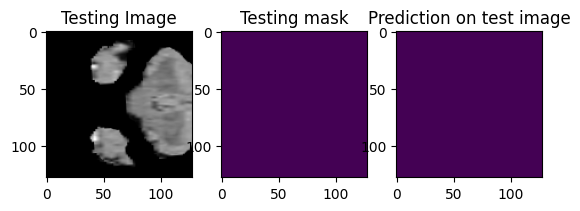

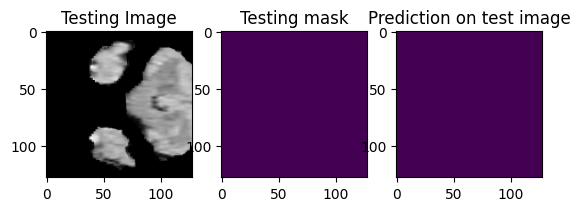

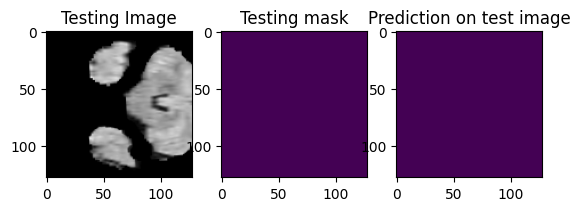

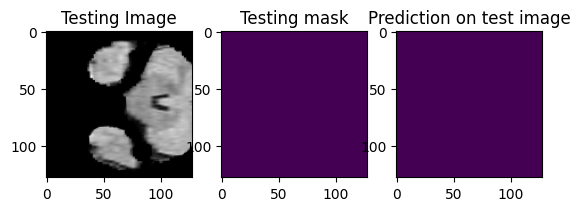

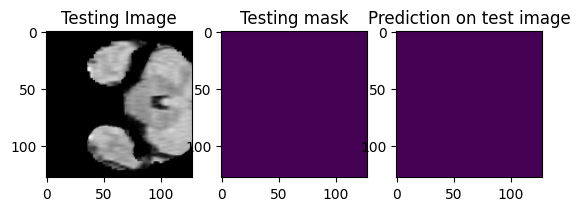

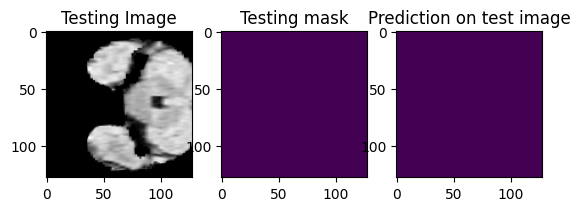

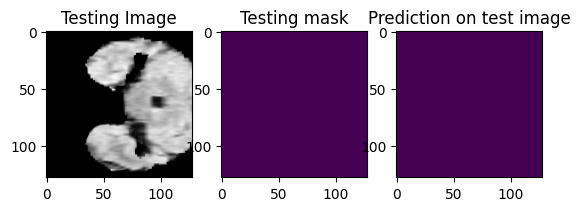

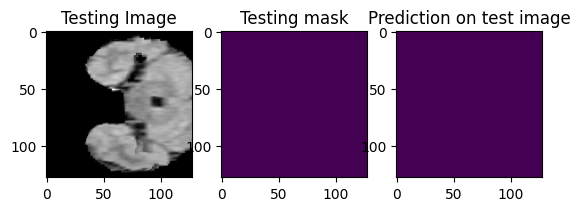

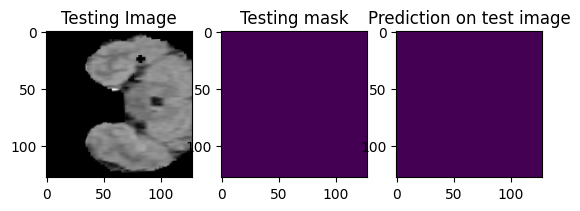

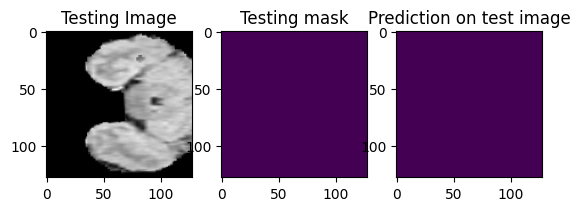

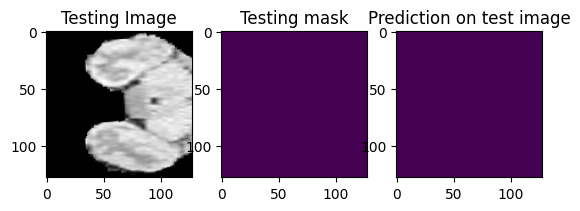

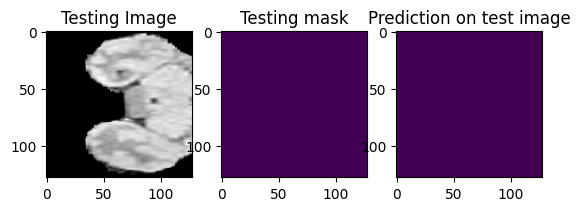

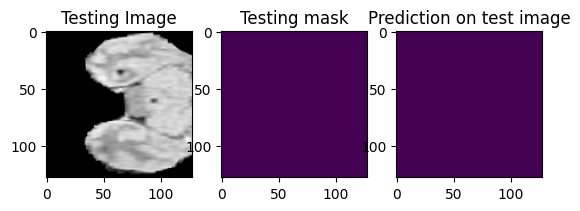

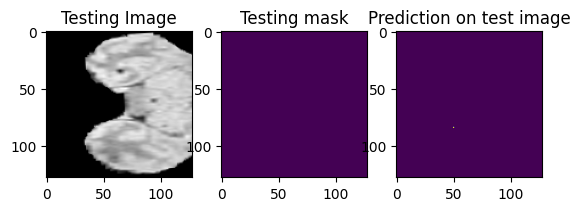

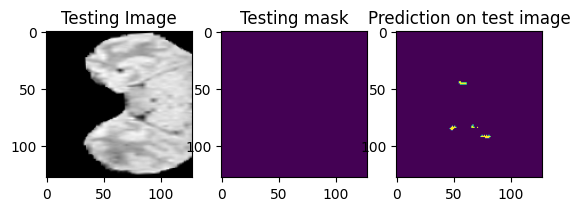

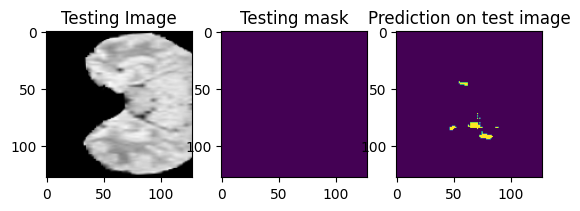

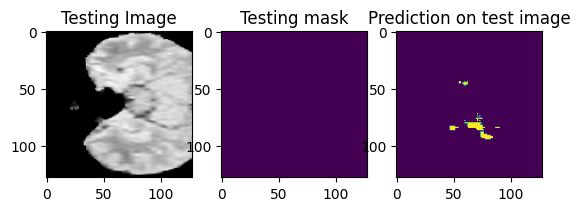

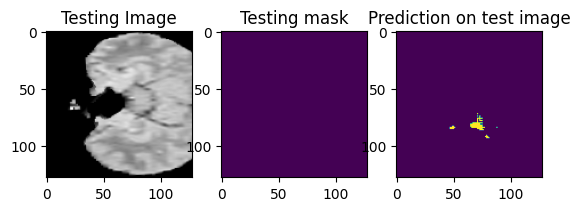

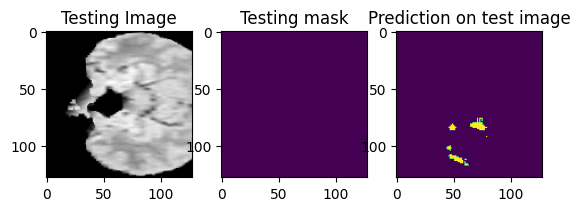

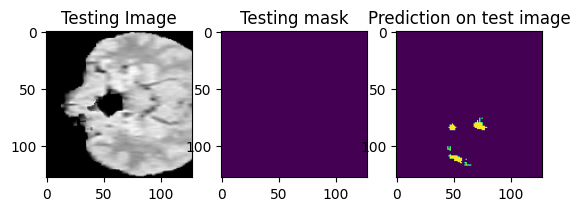

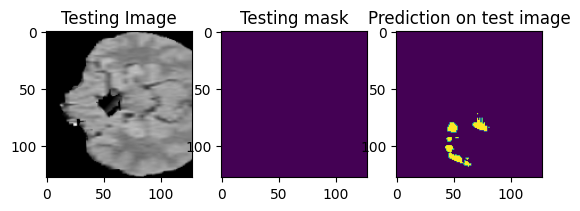

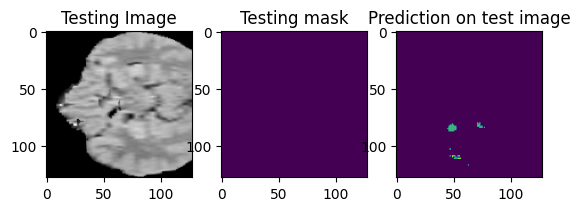

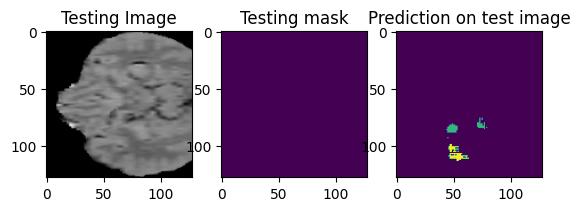

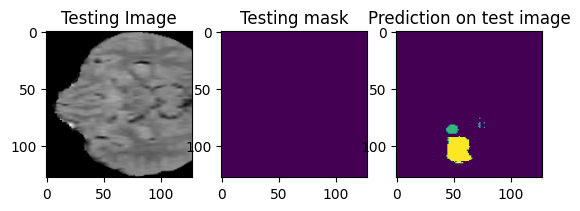

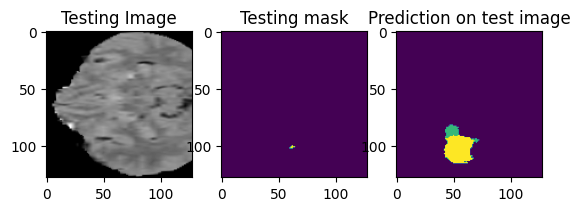

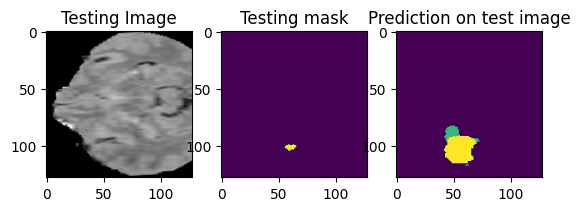

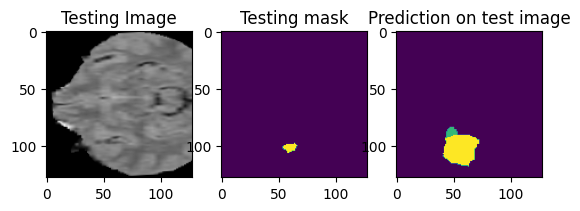

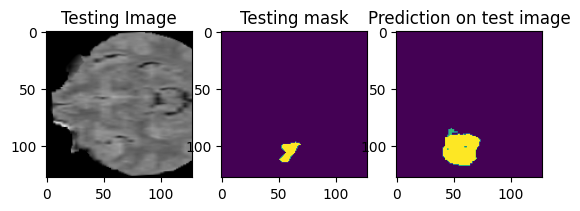

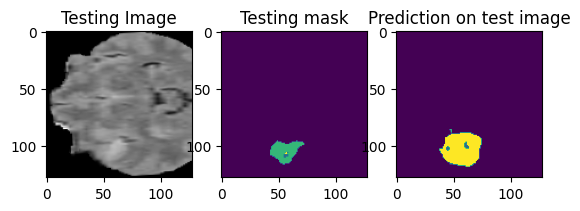

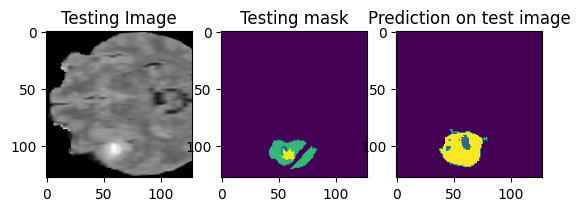

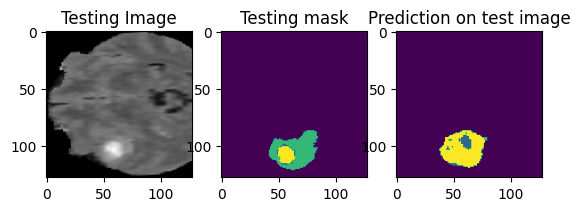

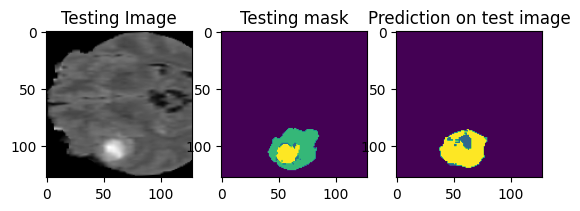

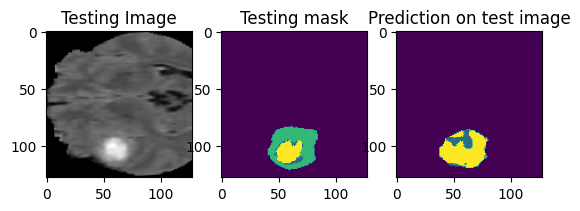

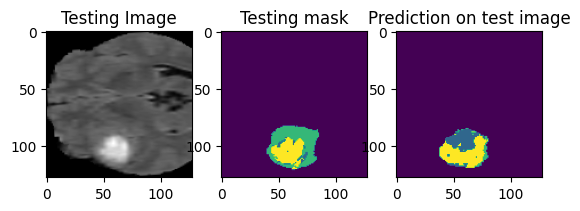

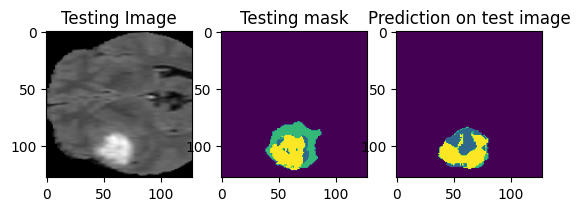

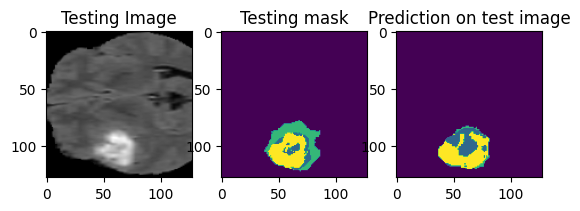

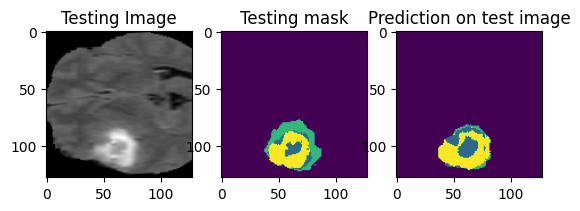

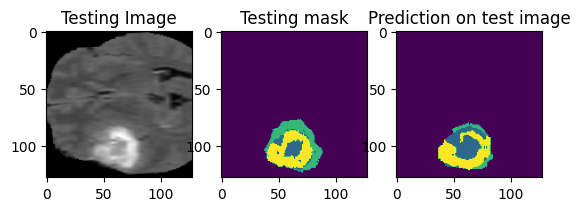

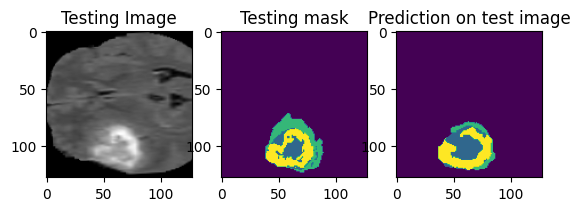

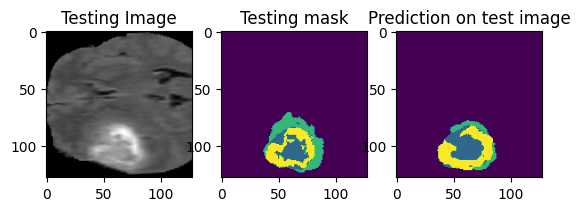

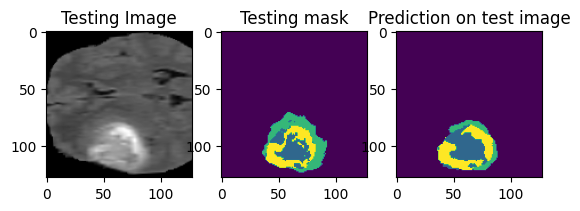

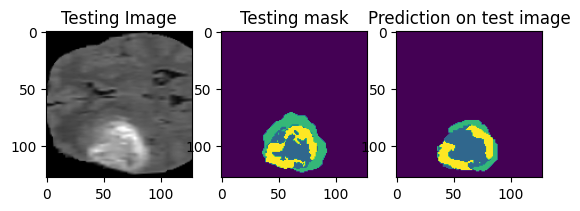

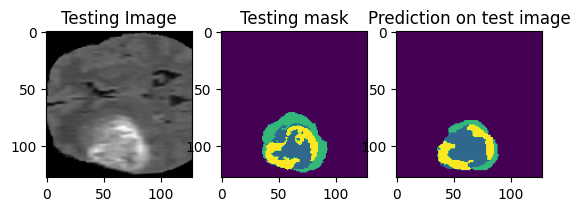

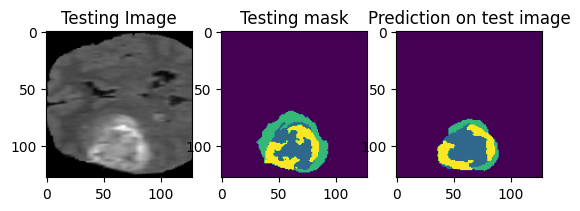

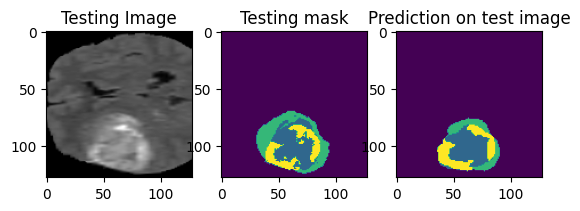

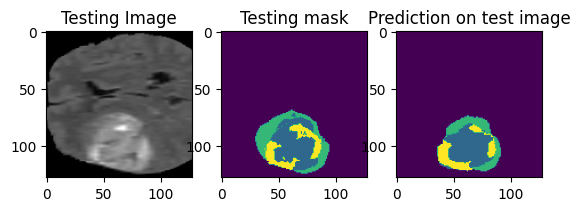

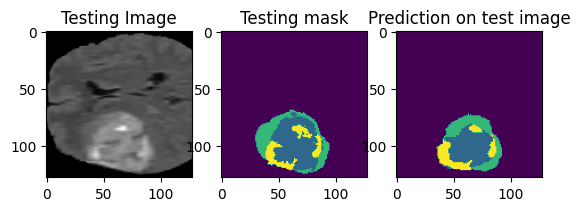

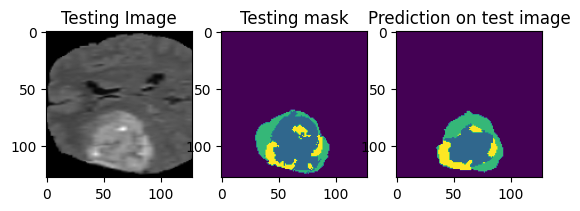

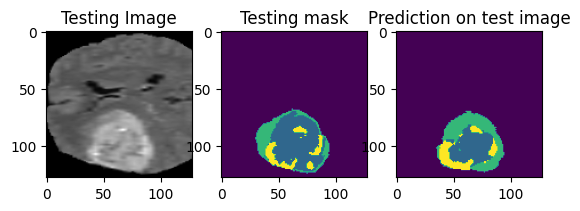

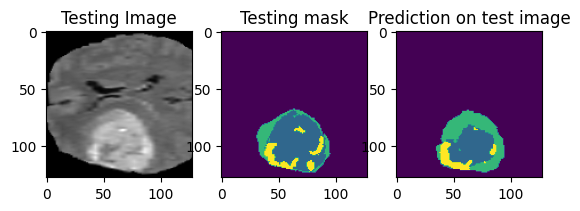

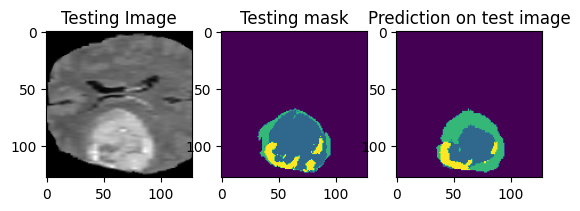

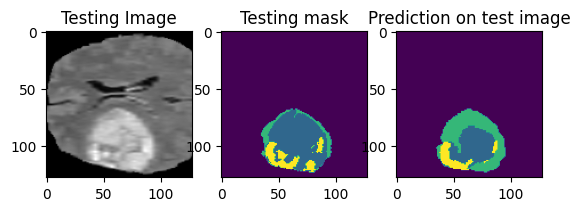

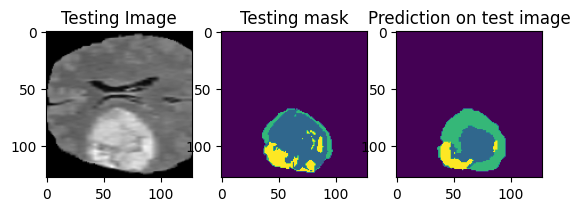

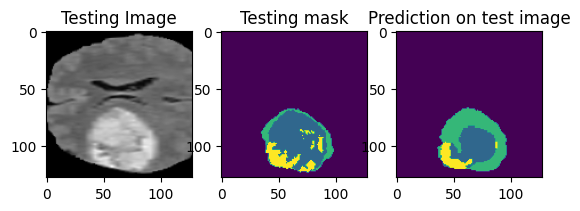

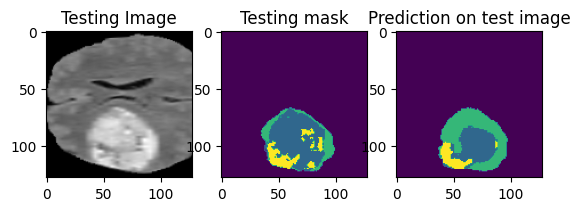

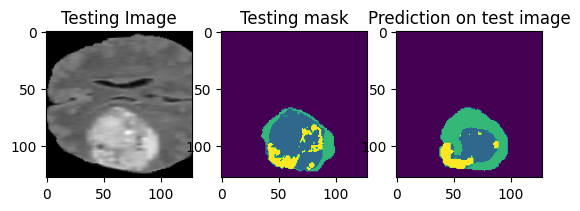

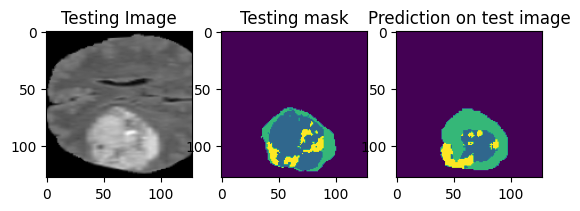

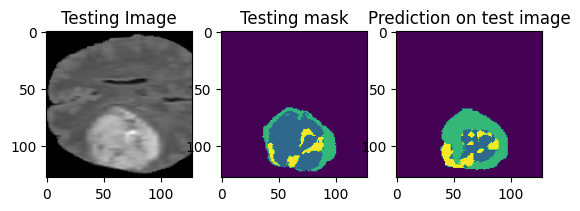

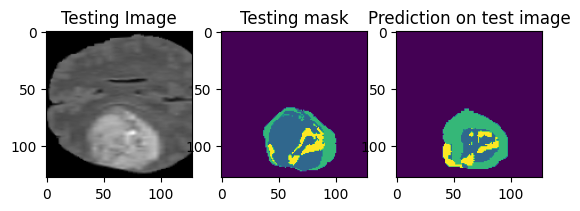

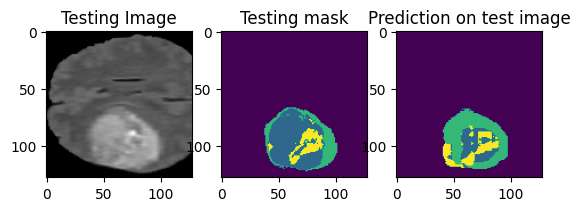

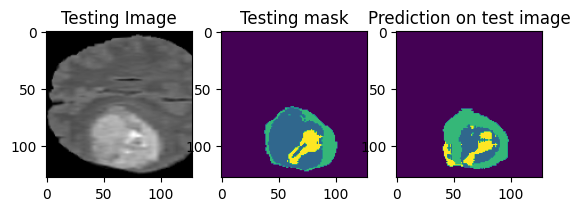

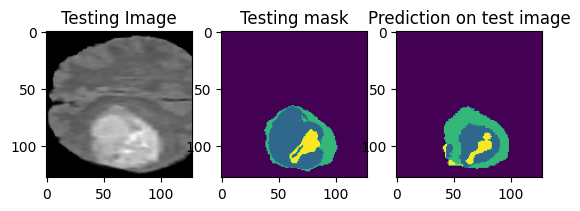

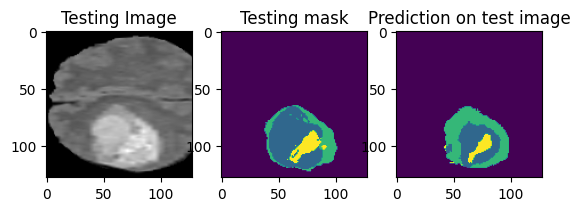

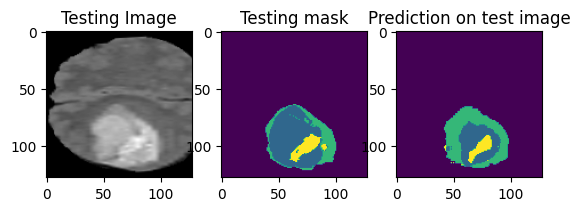

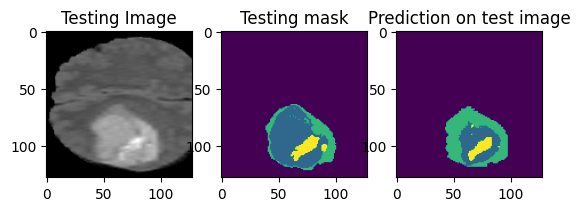

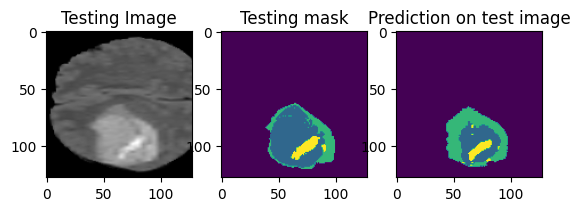

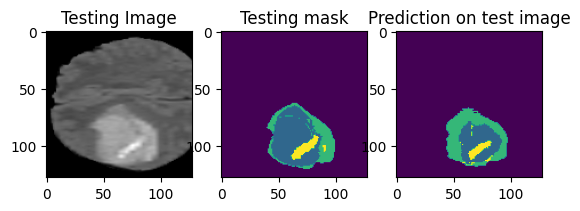

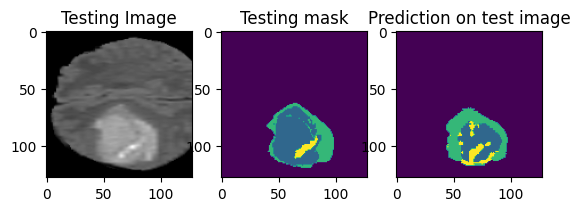

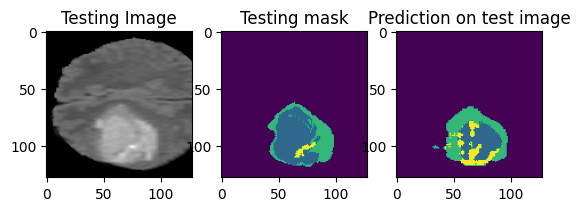

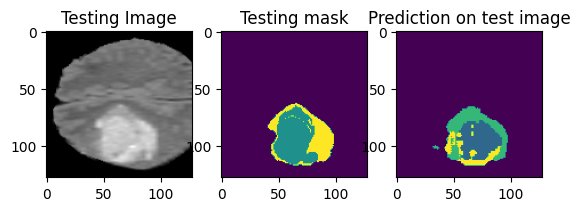

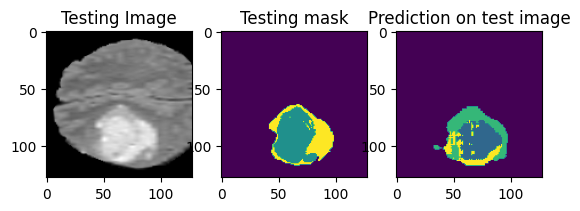

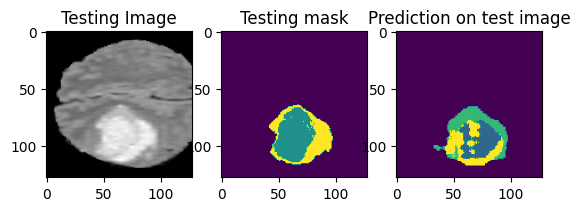

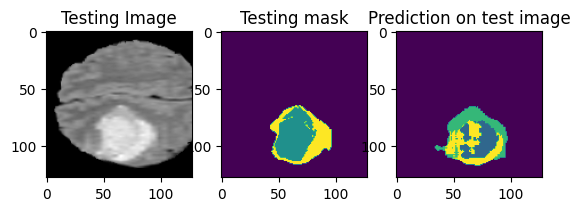

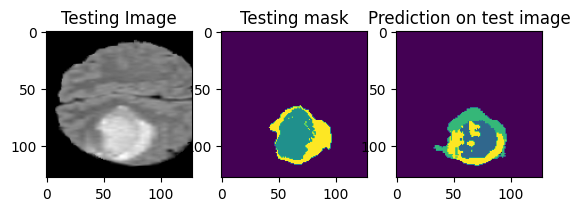

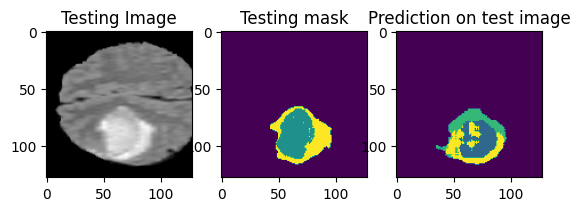

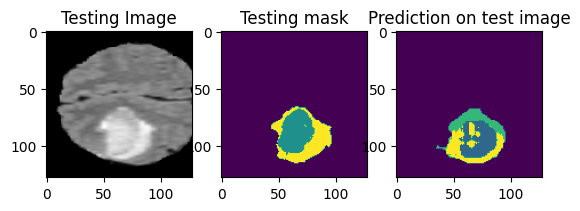

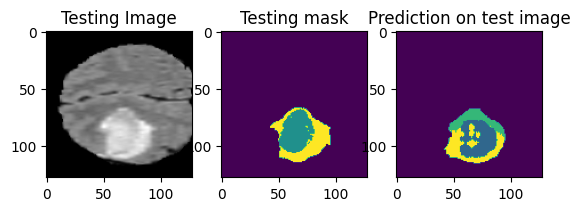

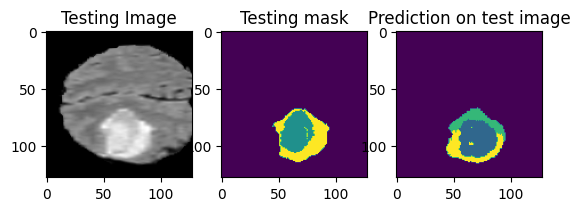

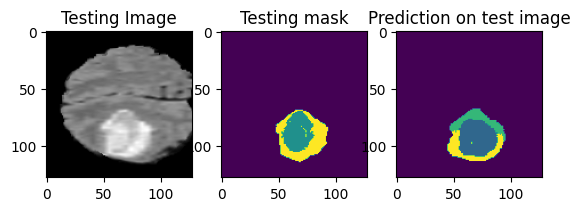

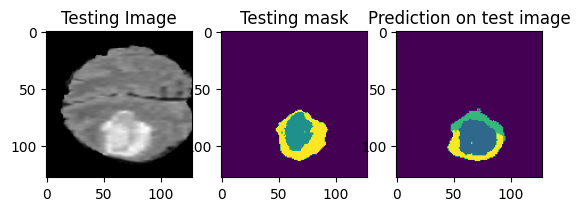

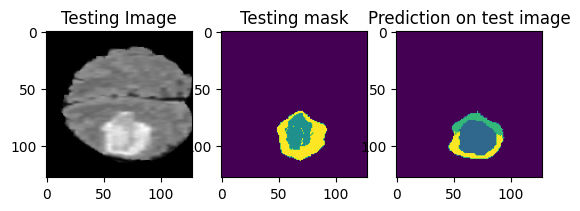

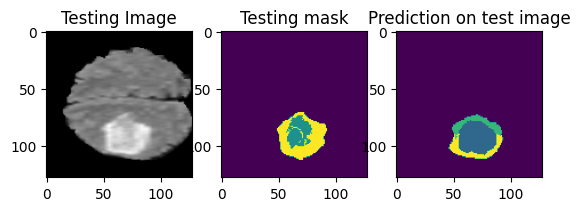

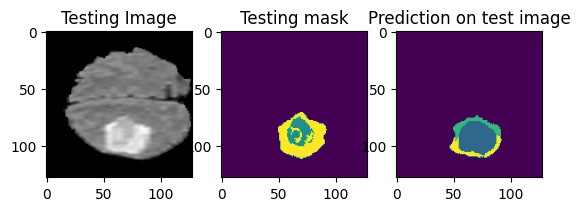

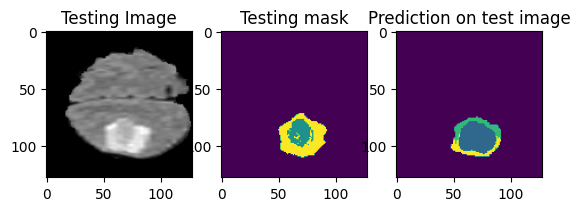

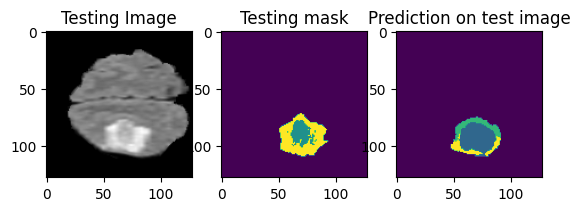

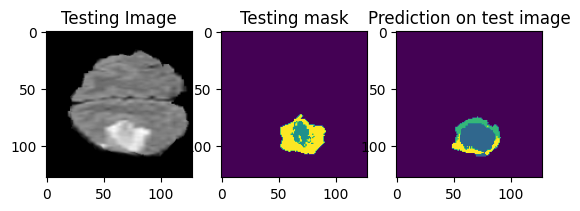

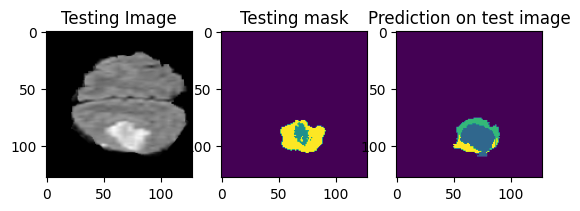

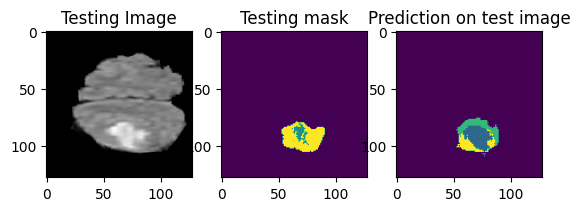

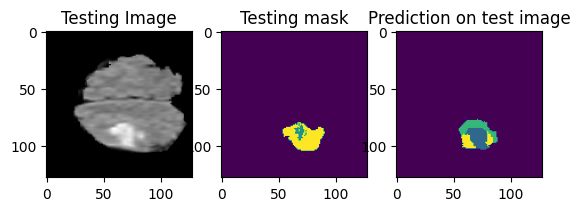

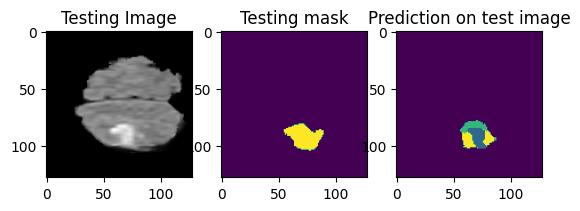

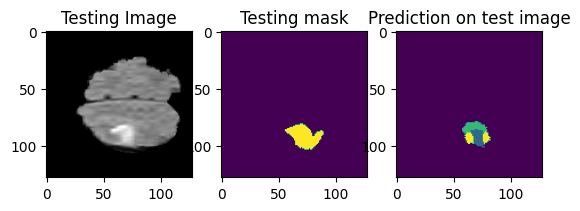

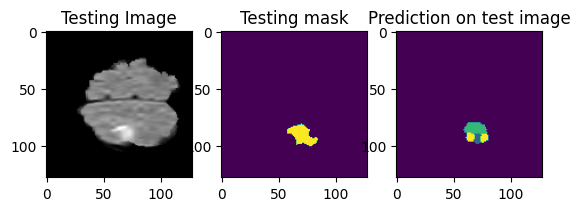

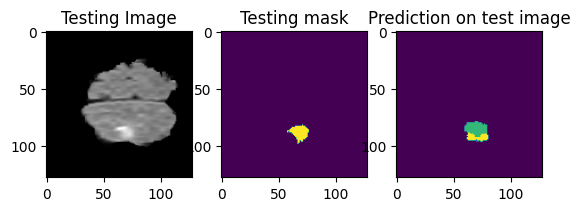

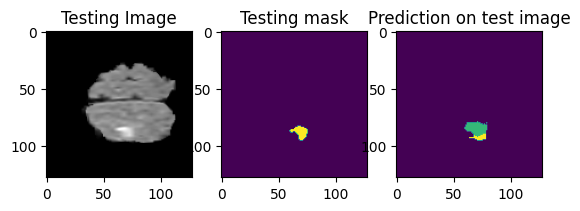

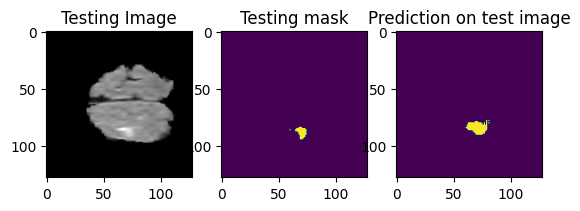

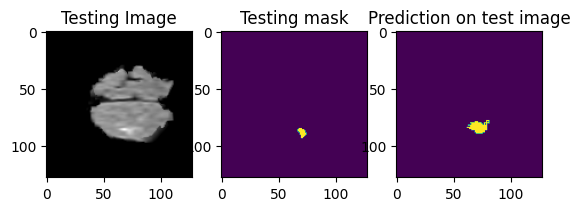

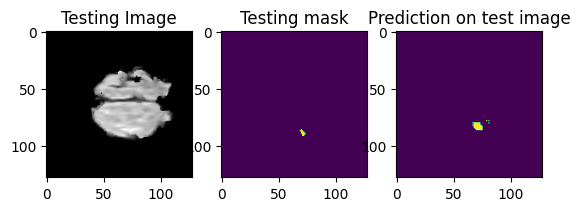

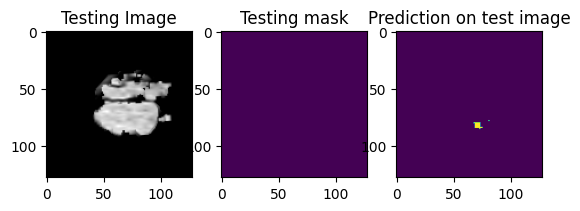

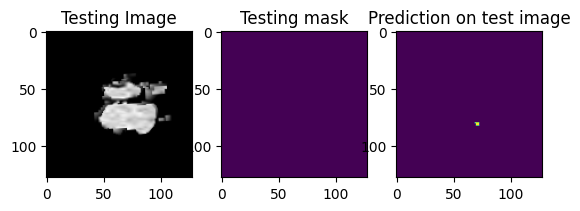

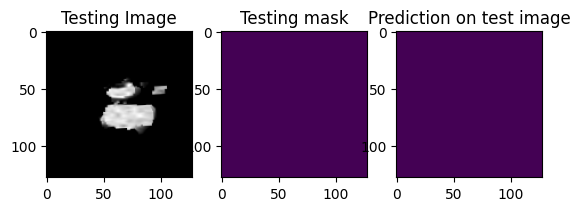

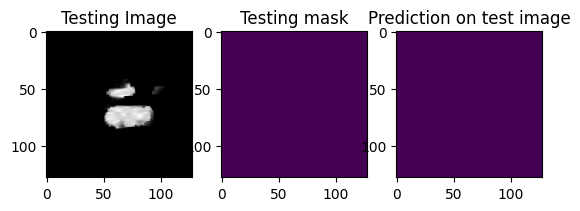

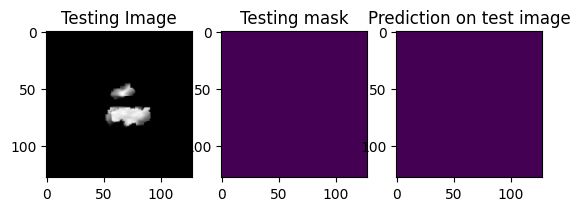

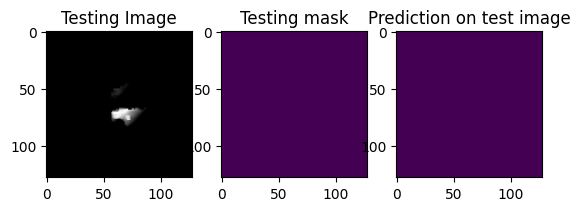

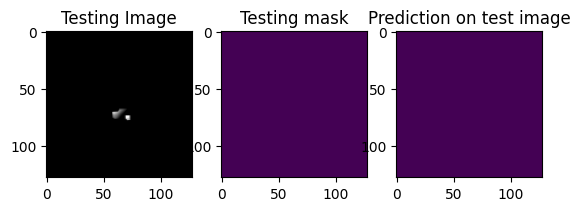

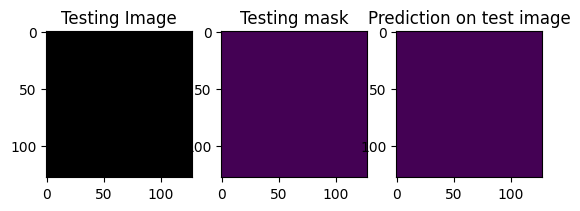

In [121]:
plt.figure(figsize=(12, 8))
n_slices = test_prediction_argmax.shape[2]
plt.figure(figsize=(12, 8))
for i in range(n_slices):
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img[:,:,i,1], cmap='gray')
    plt.subplot(232)
    plt.title('Testing mask')
    plt.imshow(test_mask_argmax[:,:,i])
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(test_prediction_argmax[:,:, i])


    plt.show()

In [122]:
###This model was trained for only 50 epochs. In the paper they used over 200 epochs and ensamble training. They also used augmentation for better results